In [30]:
import pandas as pd
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.colors as mcolors
from sklearn.manifold import TSNE
import umap
from sklearn.neighbors import KNeighborsClassifier

Task 1.1

In [3]:
df = pd.read_csv("train_in.csv", header=None)
labels = pd.read_csv("train_out.csv", header=None)
df["label"] = labels[0]
#print(df.head())
df_test = pd.read_csv("test_in.csv", header=None)
labels_test = pd.read_csv("test_out.csv", header=None)
df_test["label"] = labels_test[0]

# calculates the means for each digit
c_d = {d: [] for d in range(10)}
for i in range(10):
    Cloud_d = df[df["label"] == i]
    means = Cloud_d.iloc[:, :-1].mean()
    means = means.to_numpy()
    c_d[i] = means

In [4]:
def distance(vector1, vector2):
    return np.linalg.norm(vector1 - vector2)

def nearest_mean_classifier(means, data_point):
    # goes through values and keys in means
    min_dist = float("inf")
    label = -1
    for key, value in means.items():
        dist = distance(data_point, value)
        if dist < min_dist:
            min_dist = dist
            label = key
    return label


In [22]:
#all combinations of numbers 0-9
comb = combinations(range(10), 2)
#dictionary of all distances between centers
center_distances = {i: round(float(distance(c_d[i[0]], c_d[i[1]])), 2) for i in comb}
center_distances

{(0, 1): 14.45,
 (0, 2): 9.33,
 (0, 3): 9.14,
 (0, 4): 10.77,
 (0, 5): 7.52,
 (0, 6): 8.15,
 (0, 7): 11.86,
 (0, 8): 9.91,
 (0, 9): 11.49,
 (1, 2): 10.13,
 (1, 3): 11.73,
 (1, 4): 10.17,
 (1, 5): 11.12,
 (1, 6): 10.61,
 (1, 7): 10.74,
 (1, 8): 10.09,
 (1, 9): 9.93,
 (2, 3): 8.18,
 (2, 4): 7.93,
 (2, 5): 7.91,
 (2, 6): 7.33,
 (2, 7): 8.87,
 (2, 8): 7.08,
 (2, 9): 8.89,
 (3, 4): 9.09,
 (3, 5): 6.12,
 (3, 6): 9.3,
 (3, 7): 8.92,
 (3, 8): 7.02,
 (3, 9): 8.35,
 (4, 5): 8.0,
 (4, 6): 8.78,
 (4, 7): 7.58,
 (4, 8): 7.38,
 (4, 9): 6.01,
 (5, 6): 6.7,
 (5, 7): 9.21,
 (5, 8): 6.97,
 (5, 9): 8.26,
 (6, 7): 10.89,
 (6, 8): 8.59,
 (6, 9): 10.44,
 (7, 8): 8.47,
 (7, 9): 5.43,
 (8, 9): 6.4}

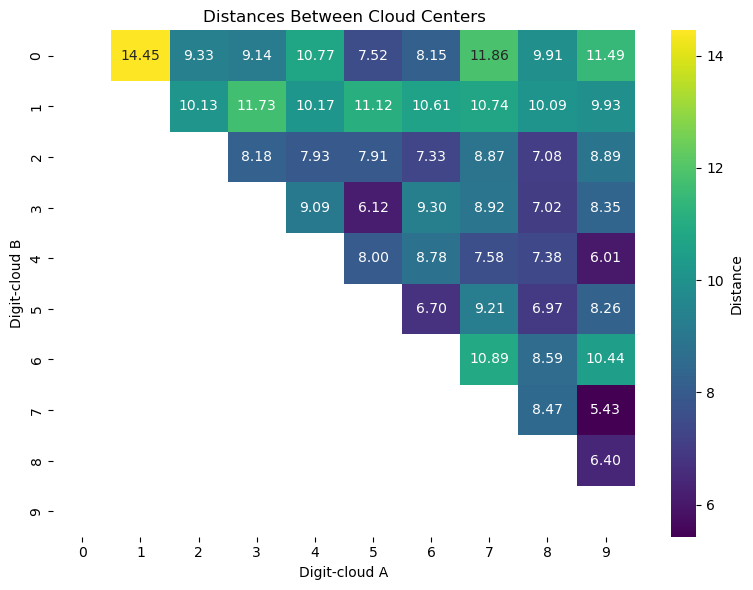

In [36]:
dist_matrix = np.full((10, 10), np.nan)
for (i, j), dist in center_distances.items():
    dist_matrix[i, j] = dist

plt.figure(figsize=(8, 6))
sns.heatmap(dist_matrix, annot=True, fmt=".2f", cmap='viridis', cbar_kws={'label': 'Distance'})
plt.title("Distances Between Cloud Centers")
plt.xlabel("Digit-cloud A")
plt.ylabel("Digit-cloud B")
plt.xticks(np.arange(10) + 0.5, range(10))
plt.yticks(np.arange(10) + 0.5, range(10))
plt.tight_layout()
plt.savefig("center_distances_heatmap.png")
plt.show()



In [6]:
# smallest distance between centers
min(center_distances.items(), key=lambda x: x[1])

((7, 9), 5.426474119055888)

In [7]:
X = df.drop(columns=["label"])
y = df["label"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

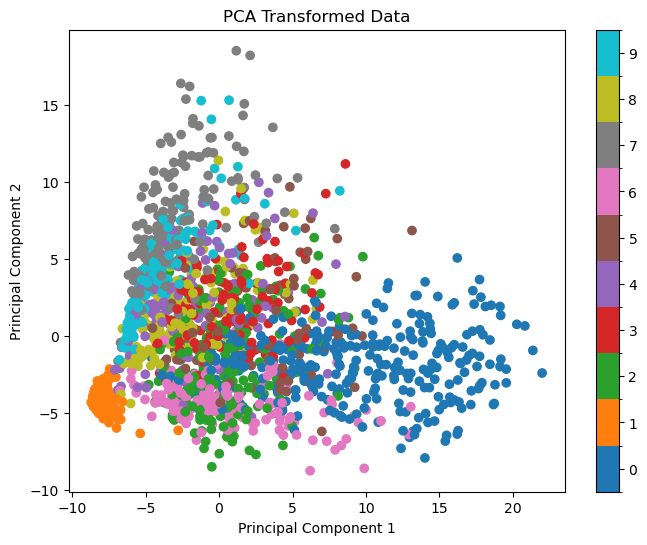

In [37]:
norm = mcolors.BoundaryNorm(boundaries=np.arange(-0.5, 10.5, 1), ncolors=10)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', norm=norm)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Transformed Data")
plt.colorbar(ticks=range(10))
plt.savefig("pca_scatter.png")
plt.show()

Task 1.2: TSNE

In [10]:
model = TSNE(n_components = 2, random_state = 0)
X_tsne = model.fit_transform(X)

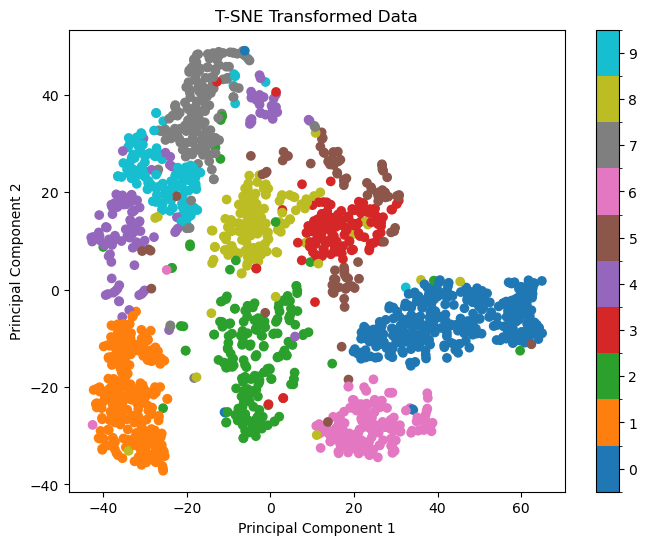

In [38]:
norm = mcolors.BoundaryNorm(boundaries=np.arange(-0.5, 10.5, 1), ncolors=10)
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', norm=norm)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("T-SNE Transformed Data")
plt.colorbar(ticks=range(10))
plt.savefig("tsne_scatter.png")
plt.show()

Task 1.2 Umap

In [12]:
X_umap = umap.UMAP().fit_transform(X)

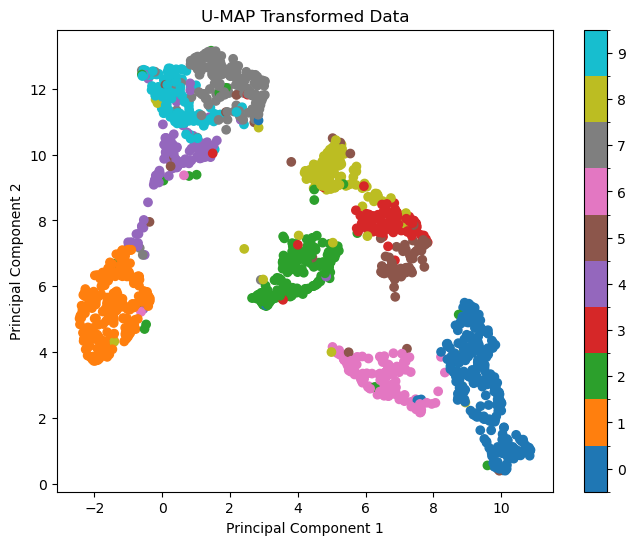

In [39]:
norm = mcolors.BoundaryNorm(boundaries=np.arange(-0.5, 10.5, 1), ncolors=10)
plt.figure(figsize=(8,6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='tab10', norm=norm)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("U-MAP Transformed Data")
plt.colorbar(ticks=range(10))
plt.savefig("umap_scatter.png")
plt.show()

Task 1.3

In [14]:
# predict all labels for train set based on nearest mean classifier
predictions = []
for i in range(len(df)):
    data_point = df.iloc[i, :-1].to_numpy()
    predictions.append(nearest_mean_classifier(c_d, data_point))

# percentage of correctly classified digits
correct = sum([1 for i in range(len(predictions)) if predictions[i] == df.iloc[i, -1]])
accuracy = correct / len(predictions)
print(f"Accuracy on training set: {accuracy*100:.2f}%")

# predict all labels for test set based on nearest mean classifier
predictions_test = []
for i in range(len(df_test)):
    data_point = df_test.iloc[i, :-1].to_numpy()
    predictions_test.append(nearest_mean_classifier(c_d, data_point))

# percentage of correctly classified digits in test set
correct_test = sum([1 for i in range(len(predictions_test)) if predictions_test[i] == df_test.iloc[i, -1]])
accuracy_test = correct_test / len(predictions_test)
print(f"Accuracy on test set: {accuracy_test*100:.2f}%")


Accuracy on training set: 86.35%
Accuracy on test set: 80.40%


Task 1.4

In [48]:
# k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# predict on train set
y_pred = knn.predict(X) 

# percentage of correctly classified digits
correct = sum([1 for i in range(len(y_pred)) if y_pred[i] == y[i]])
accuracy = correct / len(y_pred)
print(f"Accuracy on training set for k-NN (5-NN): {accuracy*100:.2f}%")


Accuracy on training set for k-NN (5-NN): 95.90%


In [49]:
X_test = df_test.drop(columns=["label"])
y_test = df_test["label"]

scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

# predict on train set
y_pred_test = knn.predict(X_test)    

# percentage of correctly classified digits in test set
correct_test = sum([1 for i in range(len(y_pred_test)) if y_pred_test[i] == y_test[i]])
accuracy_test = correct_test / len(y_pred_test)
print(f"Accuracy on test set: {accuracy_test*100:.2f}%")

Accuracy on test set: 90.30%


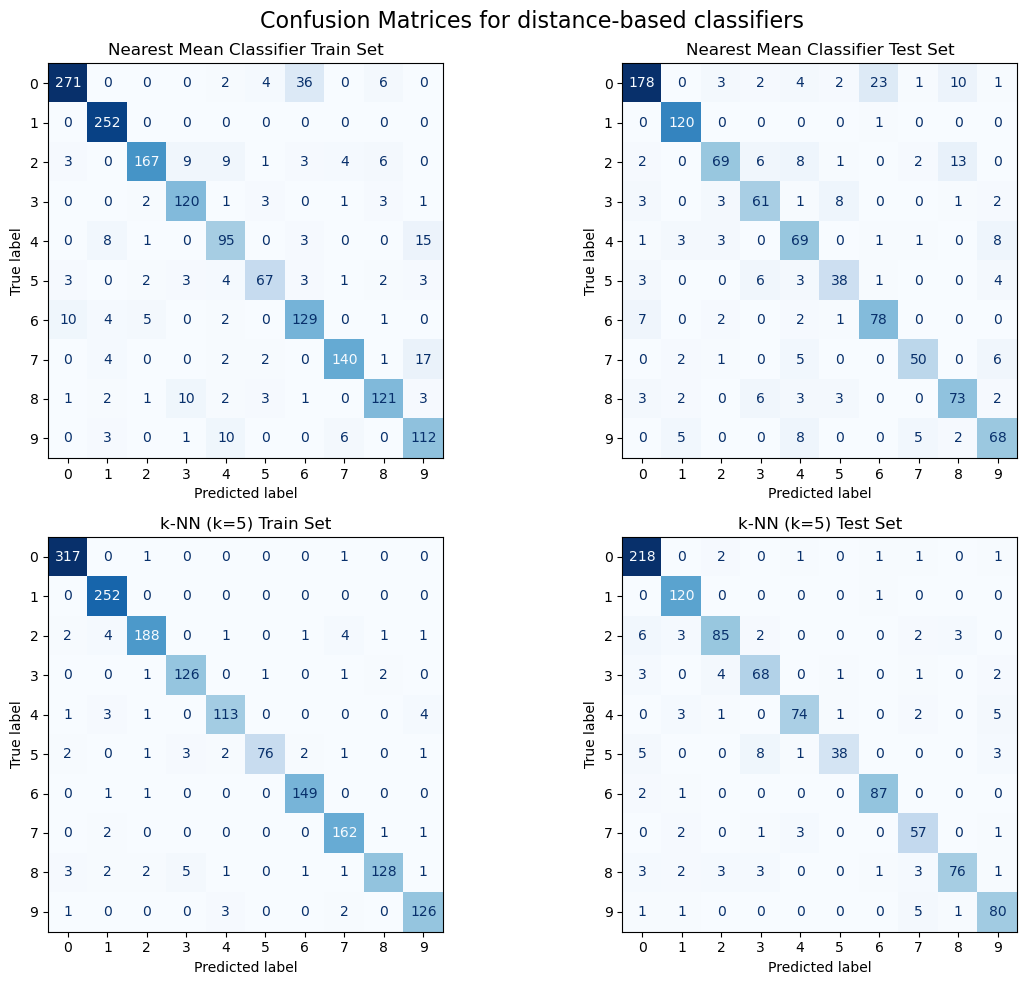

In [51]:

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Confusion matrix for nearest mean classifier on train set
cm1 = confusion_matrix(y, predictions)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=range(10))
disp1.plot(cmap=plt.cm.Blues, ax=axs[0, 0], colorbar=False)
axs[0, 0].set_title("Nearest Mean Classifier Train Set")

# Confusion matrix for nearest mean classifier on test set
cm2 = confusion_matrix(y_test, predictions_test)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=range(10))
disp2.plot(cmap=plt.cm.Blues, ax=axs[0, 1], colorbar=False)
axs[0, 1].set_title("Nearest Mean Classifier Test Set")

# Confusion matrix for k-NN on train set
cm3 = confusion_matrix(y, y_pred)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=range(10))
disp3.plot(cmap=plt.cm.Blues, ax=axs[1, 0], colorbar=False)
axs[1, 0].set_title("k-NN (k=5) Train Set")

# Confusion matrix for k-NN on test set
cm4 = confusion_matrix(y_test, y_pred_test)
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=range(10))
disp4.plot(cmap=plt.cm.Blues, ax=axs[1, 1], colorbar=False)
axs[1, 1].set_title("k-NN (k=5) Test Set")


fig.suptitle("Confusion Matrices for distance-based classifiers", fontsize=16)
plt.tight_layout()
plt.savefig("confusion_matrices.png")